In [9]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Create sampling points
points = [Point(625466, 5621289), Point(626082, 5621627), Point(627116, 5621680), Point(625095, 5622358)]
gdf = geopandas.GeoDataFrame([1, 2, 3, 4], geometry=points, crs=32630)

In [3]:
gdf.head()

,0,geometry
0,1,POINT (625466.000 5621289.000)
1,2,POINT (626082.000 5621627.000)
2,3,POINT (627116.000 5621680.000)
3,4,POINT (625095.000 5622358.000)


In [4]:
src = rasterio.open('data/s2a_l2a_fishbourne.tif')

<AxesSubplot: >

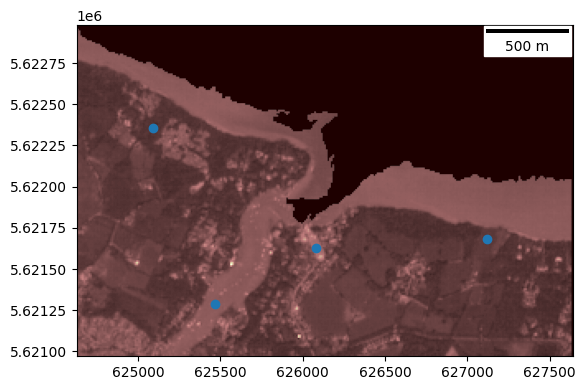

In [11]:
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')
ax.add_artist(ScaleBar(1))
gdf.plot(ax=ax)

In [6]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]

In [7]:
gdf['value'] = [x for x in src.sample(coord_list)]
gdf.head()


,0,geometry,value
0,1,POINT (625466.000 5621289.000),"[684.0, 1005.0, 707.0, 265.0]"
1,2,POINT (626082.000 5621627.000),"[999.0, 1105.0, 1115.0, 1340.0]"
2,3,POINT (627116.000 5621680.000),"[284.0, 713.0, 310.0, 5405.0]"
3,4,POINT (625095.000 5622358.000),"[237.0, 564.0, 250.0, 3680.0]"
